# Классификация ирисов 

In [31]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
import random as rd
import requests
import io

In [32]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
raw_dataset = requests.get(data_url)
assert raw_dataset.status_code == 200

In [33]:
frame = pd.read_csv(io.StringIO(raw_dataset.text),header = None, quotechar=',', skipinitialspace=True)

In [34]:
dat_mat = np.zeros((150,4))
for i in range(4):
    dat_mat[:,i] = frame[i] 
dat_mat = dat_mat.T

In [35]:
dat_mat_train = np.zeros((4,75))
dat_mat_test = np.zeros((4,75))
for i in range(75):
    dat_mat_train[:,i] = dat_mat[:,i * 2]
    dat_mat_test[:,i] = dat_mat[:,1 + i * 2]


In [36]:
solution = np.zeros((3, 75))
solution[0,:25] = 1
solution[1,25:50] = 1
solution[2,50:75] = 1
#TODO: Сделать чуть более общим

In [192]:
NUM_INPUT = 4
NUM_HIDDEN = 11
NUM_OUTPUT = 3

In [38]:
def logreg(x):
    return 1./(1.+np.exp(-x))

In [88]:
def network(wghs, dat):
    dat = dat.reshape((4, 75))
    wgs_mat_size_1 = NUM_INPUT * NUM_HIDDEN
    wgs_mat_size_2 = NUM_HIDDEN * NUM_OUTPUT
    wgs_1 = wghs[:wgs_mat_size_1].reshape((NUM_HIDDEN, 4))
    wgs_2 = wghs[wgs_mat_size_1:wgs_mat_size_1 + wgs_mat_size_2].reshape((3, NUM_HIDDEN))
    z = logreg(np.dot(wgs_1, dat))
    z = logreg(np.dot(wgs_2, z))
    return z

In [89]:
def loss(wgs, data):
    z = network(wgs, data)
    _sum = 0
    for i in range(75):
        sq = np.linalg.norm(z[:,i] - solution[:,i])
        _sum += sq ** 2
    return _sum*(1./75.)    

In [193]:
wgs_size = (NUM_INPUT + NUM_OUTPUT) * NUM_HIDDEN
wgs_0 = np.random.sample(wgs_size)
while True:
    if optimize.minimize(loss, wgs_0, dat_mat_train).fun < 1 and optimize.minimize(loss, wgs_0, dat_mat_train).success:
        wgs_1 = optimize.minimize(loss, wgs_0, dat_mat_train).x
        # print(optimize.minimize(loss, wgs_0, dat_mat_train))
        break
print loss(wgs_1, dat_mat_train)
print loss(wgs_1, dat_mat_test)        

0.026666804755331622
0.0271012330671861


In [117]:
std_1 = []
std_2 = []

In [194]:
std_1.append(loss(wgs_1, dat_mat_train))
std_2.append(loss(wgs_1, dat_mat_test))

In [96]:
import matplotlib.pyplot as plt

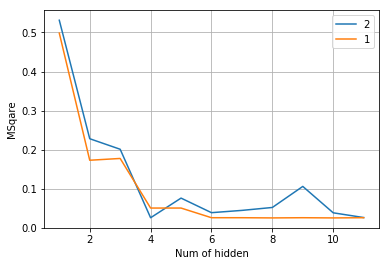

In [197]:
x = np.linspace(1,11,11)

plt.plot(x, std_2, label = '2')
plt.plot(x, std_1, label = '1')

plt.legend(loc='best')
plt.xlabel('Num of hidden neuros')
plt.ylabel('MSqare')
plt.grid()
plt.savefig('graph.pdf')